# Import Libraries

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('BlackFriday.csv')

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
df['Product_ID']

0         P00069042
1         P00248942
2         P00087842
3         P00085442
4         P00285442
5         P00193542
6         P00184942
7         P00346142
8          P0097242
9         P00274942
10        P00251242
11        P00014542
12        P00031342
13        P00145042
14        P00231342
15        P00190242
16         P0096642
17        P00058442
18        P00036842
19        P00249542
20        P00220442
21        P00156442
22        P00213742
23        P00214442
24        P00303442
25        P00135742
26        P00039942
27        P00161442
28        P00078742
29        P00085942
            ...    
537547    P00244042
537548    P00111042
537549    P00345842
537550    P00278242
537551    P00313442
537552     P0098642
537553    P00119342
537554    P00114042
537555    P00135142
537556    P00194542
537557    P00175242
537558    P00101942
537559    P00109142
537560    P00084842
537561    P00078142
537562    P00146742
537563    P00154642
537564    P00117442
537565    P00051142


In [5]:
df.sample(30)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
16939,1002643,P00348942,M,46-50,17,B,1,1,8,13.0,NaN,8115
195751,1000202,P00074342,M,18-25,4,A,3,0,5,NaN,NaN,5199
481567,1002105,P00036842,M,26-35,1,A,0,1,1,14.0,16.0,11870
371515,1003265,P00028542,M,26-35,15,A,1,0,6,8.0,14.0,12313
14940,1002219,P00289042,M,26-35,6,C,3,0,8,NaN,NaN,7776
410293,1003201,P00258542,M,46-50,7,B,0,1,11,NaN,NaN,4604
536706,1004598,P00034942,F,36-45,3,C,0,1,8,NaN,NaN,5872
369762,1002972,P00303342,M,26-35,4,A,3,1,1,16.0,NaN,7975
432443,1000583,P00277642,F,26-35,0,A,4+,0,2,3.0,10.0,13029
300157,1004200,P00193742,M,46-50,7,C,1,0,8,15.0,NaN,8098


In [6]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00038842',
       'P00295642', 'P00091742'], dtype=object)

In [7]:
df['Purchase'].describe()

count    537577.000000
mean       9333.859853
std        4981.022133
min         185.000000
25%        5866.000000
50%        8062.000000
75%       12073.000000
max       23961.000000
Name: Purchase, dtype: float64

In [8]:
df['Gender'].value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

In [9]:
df['Occupation'].describe()

count    537577.00000
mean          8.08271
std           6.52412
min           0.00000
25%           2.00000
50%           7.00000
75%          14.00000
max          20.00000
Name: Occupation, dtype: float64

In [10]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [11]:
df['City_Category'].value_counts()

B    226493
C    166446
A    144638
Name: City_Category, dtype: int64

In [12]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [13]:
df['Stay_In_Current_City_Years'].value_counts()

1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


User_ID: Unique identifier of shopper.

Product_ID: Unique identifier of product. (No key given)

Gender: Sex of shopper.

Age: Age of shopper split into bins.

Occupation: Occupation of shopper. (No key given)

City_Category: Residence location of shopper. (No key given)

Stay_In_Current_City_Years: Number of years stay in current city.

Marital_Status: Marital status of shopper.

Product_Category_1: Product category of purchase.

Product_Category_2: Product may belong to other category.

Product_Category_3: Product may belong to other category.

Purchase: Purchase amount in dollars.

In [15]:
df['Purchase'].value_counts()

6855     186
7011     185
7193     182
6891     182
6879     181
7027     180
7012     180
6883     179
7166     179
7165     179
6960     178
6868     176
7089     176
7093     176
6923     176
6858     176
7167     175
7114     175
7185     174
6931     174
7060     174
6928     174
6973     173
6904     173
7146     173
7047     173
7108     172
7034     171
6908     171
7010     171
        ... 
14891      1
21279      1
2686       1
21486      1
14968      1
10362      1
23856      1
14456      1
20974      1
18550      1
14609      1
5678       1
23481      1
23669      1
14568      1
6781       1
4732       1
4921       1
14969      1
17203      1
17014      1
23157      1
21108      1
14890      1
23344      1
18719      1
898        1
14457      1
13947      1
3326       1
Name: Purchase, Length: 17959, dtype: int64

In [16]:
df = df.dropna()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164278 entries, 1 to 537573
Data columns (total 12 columns):
User_ID                       164278 non-null int64
Product_ID                    164278 non-null object
Gender                        164278 non-null object
Age                           164278 non-null object
Occupation                    164278 non-null int64
City_Category                 164278 non-null object
Stay_In_Current_City_Years    164278 non-null object
Marital_Status                164278 non-null int64
Product_Category_1            164278 non-null int64
Product_Category_2            164278 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      164278 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 16.3+ MB


In [18]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [19]:
df['Age']

1          0-17
6         46-50
13        26-35
14        51-55
16        51-55
18        36-45
19        26-35
24        26-35
28        26-35
29        36-45
36        36-45
38        36-45
39        36-45
41        36-45
43        36-45
44        36-45
46        36-45
48        26-35
54        46-50
64        26-35
65        36-45
67        51-55
69        51-55
71        18-25
72        18-25
73        18-25
75        18-25
76        18-25
77        18-25
78        18-25
          ...  
537489    26-35
537490    26-35
537495    26-35
537498    26-35
537499    26-35
537507    26-35
537508    26-35
537510    51-55
537515    26-35
537516    26-35
537517    26-35
537519    26-35
537520    26-35
537521    26-35
537523    26-35
537526    26-35
537528    26-35
537529    26-35
537531    26-35
537539    26-35
537542    26-35
537544    26-35
537545    18-25
537546    18-25
537547    18-25
537549    51-55
537551    46-50
537562    18-25
537571    36-45
537573    36-45
Name: Age, Length: 16427

# Visualization 

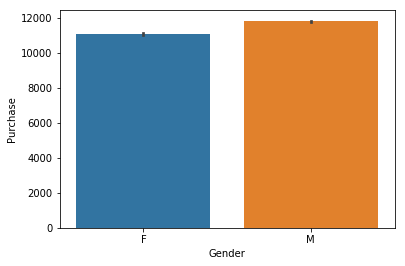

In [20]:
sns.barplot(x='Gender', y='Purchase', data=df)

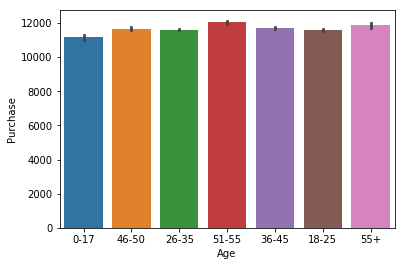

In [21]:
sns.barplot(x='Age', y='Purchase', data=df)

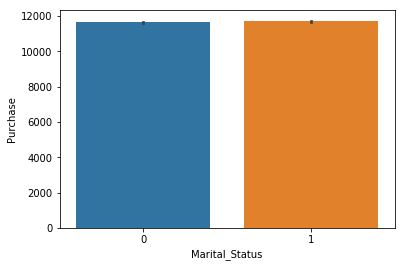

In [22]:
sns.barplot(x='Marital_Status', y='Purchase', data=df)

In [23]:
df['Product_ID'].value_counts()

P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
P00184942    1424
P00046742    1417
P00145042    1384
P00059442    1384
P00237542    1374
P00010742    1331
P00110842    1260
P00102642    1228
P00242742    1194
P00034742    1188
P00080342    1186
P00148642    1179
P00114942    1162
P00270942    1141
P00000142    1130
P00112542    1113
P00111142    1004
P00277642     968
P00116842     966
P00295942     959
P00086442     956
P00003442     951
P00085942     945
P00216342     925
P00113242     921
P00073842     921
             ... 
P00329942      18
P00163742      17
P00107042      17
P00353442      17
P00223442      16
P00131442      15
P00107142      15
P00356342      15
P00342442      14
P00229142      14
P00337342      13
P0099942       13
P00035042      12
P00353342      12
P00337242      11
P00266742      10
P00038042      10
P00239042       9
P00247442       8
P00358642       8
P00164442       6
P00182942       6
P00076942       5
P00005542       4
P00321242 

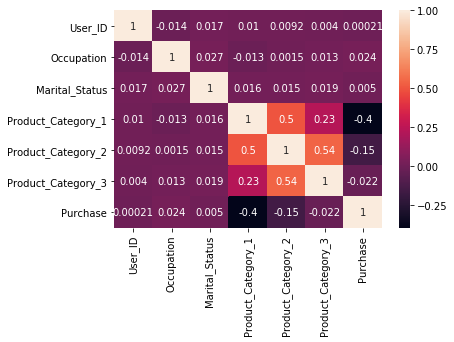

In [24]:
df.corr()
sns.heatmap(df.corr(), annot=True)

# Create a frequency table for single items in a transactional dataset

In [25]:
order_baskets = df.groupby(['User_ID']).Product_ID.apply(np.array).reset_index()
order_baskets.head(30)

,User_ID,Product_ID
0,1000001,"[P00248942, P00085942, P00102642, P00110842, P..."
1,1000002,"[P00289342, P00034742, P00177442, P00116842, P..."
2,1000003,"[P00128042, P00112142, P00182742, P00110742, P..."
3,1000004,"[P00184942, P00046742, P00329542, P00114942, P..."
4,1000005,"[P00145042, P00324442, P00036842, P00173342, P..."
5,1000006,"[P00231342, P0096642, P00344442, P00035542, P0..."
6,1000007,"[P00036842, P00046742, P00113242, P00270942, P..."
7,1000008,"[P00249542, P00303442, P00237542, P00054242, P..."
8,1000009,"[P00078742, P00114342, P00289942, P00350942, P..."
9,1000010,"[P00085942, P00182642, P00155442, P00221342, P..."


# Create a SparseMatrix

In [26]:
te = TransactionEncoder()
te_ary = te.fit(order_baskets['Product_ID']).transform(order_baskets['Product_ID'])
dataset = pd.DataFrame(te_ary, columns=te.columns_)
dataset

,P00000142,P00000242,P00000642,P00001042,P00001142,P00001542,P00002142,P00002242,P00003442,P00004242,...,P0096442,P0096542,P0096642,P0096742,P0096842,P0097342,P0099042,P0099742,P0099842,P0099942
0,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,True,False,...,True,False,True,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False


# Create Rules: Most common items bought

In [27]:
frequent_itemsets = apriori(dataset, min_support=0.03, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets = frequent_itemsets[ (frequent_itemsets['length'] == 2)]
frequent_itemsets

,support,itemsets,length
303,0.033913,"(P00000142, P00001142)",2
304,0.041241,"(P00000142, P00002142)",2
305,0.060838,"(P00000142, P00003442)",2
306,0.057941,"(P00000142, P00010742)",2
307,0.070552,"(P00000142, P00025442)",2
308,0.030504,"(P00000142, P00030842)",2
309,0.031357,"(P00000142, P00034042)",2
310,0.068166,"(P00000142, P00034742)",2
311,0.041411,"(P00000142, P00035542)",2
312,0.042093,"(P00000142, P00035842)",2


# Definitions

Note: It might look more complicated, but the important things are

antecedents stands for "when people buy these products

consequents stands for "they are likely to buy this, too

support confidence is how often a rule is found to be true

Lift If the rule had a lift of 1, it would imply that the probability of occurrence, and that of the consequent are independent of each other.

If the lift is > 1, that lets us know the degree to which those two occurrences are dependent on one another, and makes those rules potentially useful for predicting the consequent in future data sets.

If the lift is < 1, that lets us know the items are mutually substitutable. This means that presence of one item has negative effect on presence of other item and vice versa.

antecedent_len stands for the number of items with the antecedent item set

# Create Rules: First set of Association Rules

In [28]:
frequent_itemsets = apriori(dataset, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules[ (rules['antecedent_len'] >= 2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
570,"(P00112142, P00110742)",(P00025442),0.110429,0.270279,0.05317,0.481481,1.781421,0.023323,1.407318,2
571,"(P00112142, P00025442)",(P00110742),0.104294,0.271132,0.05317,0.509804,1.880282,0.024892,1.486892,2
572,"(P00110742, P00025442)",(P00112142),0.118098,0.262270,0.05317,0.450216,1.716615,0.022196,1.341855,2


In [32]:
rules.head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(P00000142),(P00003442),0.192570,0.162065,0.060838,0.315929,1.949393,0.029630,1.224924,1
1,(P00003442),(P00000142),0.162065,0.192570,0.060838,0.375394,1.949393,0.029630,1.292704,1
2,(P00000142),(P00010742),0.192570,0.226823,0.057941,0.300885,1.326516,0.014262,1.105936,1
3,(P00000142),(P00025442),0.192570,0.270279,0.070552,0.366372,1.355529,0.018504,1.151654,1
4,(P00000142),(P00034742),0.192570,0.202454,0.068166,0.353982,1.748458,0.029180,1.234558,1
5,(P00034742),(P00000142),0.202454,0.192570,0.068166,0.336700,1.748458,0.029180,1.217293,1
6,(P00000142),(P00046742),0.192570,0.241479,0.063395,0.329204,1.363279,0.016893,1.130776,1
7,(P00057542),(P00000142),0.122018,0.192570,0.054874,0.449721,2.335364,0.031377,1.467310,1
8,(P00000142),(P00057642),0.192570,0.243695,0.065099,0.338053,1.387200,0.018171,1.142547,1
9,(P00000142),(P00059442),0.192570,0.235855,0.060157,0.312389,1.324495,0.014738,1.111304,1


# Calculate Lift

In [34]:
frequent_itemsets = apriori(dataset, min_support=0.04, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules[ (rules['antecedent_len'] >= 2) &
       (rules['lift'] > 2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
447,"(P00114942, P00025442)",(P00057642),0.086571,0.243695,0.044308,0.511811,2.100215,0.023211,1.549206,2
448,"(P00057642, P00025442)",(P00114942),0.095774,0.198023,0.044308,0.462633,2.336259,0.025343,1.492420,2
456,"(P00057642, P00025442)",(P00270942),0.095774,0.194444,0.042434,0.443060,2.278597,0.023811,1.446397,2
457,"(P00270942, P00025442)",(P00057642),0.081118,0.243695,0.042434,0.523109,2.146577,0.022666,1.585909,2
459,"(P00102642, P00025442)",(P00110742),0.084356,0.271132,0.046524,0.551515,2.034124,0.023652,1.625180,2
486,"(P00046742, P00110742)",(P00057642),0.095433,0.243695,0.046524,0.487500,2.000455,0.023267,1.475718,2
494,"(P00270942, P00046742)",(P00057642),0.085890,0.243695,0.046012,0.535714,2.198302,0.025081,1.628965,2
495,"(P00057642, P00046742)",(P00270942),0.099693,0.194444,0.046012,0.461538,2.373626,0.026627,1.496032,2
504,"(P00046742, P00110742)",(P00270942),0.095433,0.194444,0.040218,0.421429,2.167347,0.021662,1.392318,2
505,"(P00112142, P00046742)",(P00145042),0.085890,0.235855,0.041070,0.478175,2.027405,0.020813,1.464368,2


# Confidence

In [35]:
rules.sort_values('confidence', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
546,"(P00270942, P00145042)",(P00057642),0.088446,0.243695,0.048909,0.552987,2.269178,0.027356,1.691907,2
552,"(P00112542, P00112142)",(P00110742),0.075835,0.271132,0.041922,0.552809,2.038896,0.021361,1.629882,2
459,"(P00102642, P00025442)",(P00110742),0.084356,0.271132,0.046524,0.551515,2.034124,0.023652,1.625180,2
494,"(P00270942, P00046742)",(P00057642),0.085890,0.243695,0.046012,0.535714,2.198302,0.025081,1.628965,2
534,"(P00270942, P00112142)",(P00057642),0.077880,0.243695,0.041411,0.531729,2.181947,0.022432,1.615101,2


# Lift in the entire Dataset

In [36]:

# calculate average lift of entire dataset

# extact lift column from rules dataframe
# NOTE The column is wanted in series form to be passed to numpy. Extracting as a dataframe would be rules.loc[:, ["lift"]]
lift_series = rules.loc[:, "lift"]

# perform averaging with np.mean function
average_lift = np.mean(lift_series)

# NOTE this is an introduction into fstrings, current best practice for formatting strings
# additional resources can be found at: https://realpython.com/python-f-strings/
print(f"The average lift of the rules dataframe is: {average_lift}")

The average lift of the rules dataframe is: 1.907694818973069


# Apriori Algorithm 

In [29]:
te = TransactionEncoder()
te_ary = te.fit(df).transform(df)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,1,2,3,A,C,D,G,I,M,O,...,i,l,n,o,p,r,s,t,u,y
0,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
1,False,False,False,False,False,True,False,True,False,False,...,False,False,False,True,False,True,False,True,True,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,True,False,True,True,True,False,False,True,True,False
5,False,False,False,False,True,False,False,False,False,False,...,True,False,False,True,False,True,False,True,False,True
6,False,False,False,False,True,False,False,True,False,False,...,True,False,True,False,False,True,True,True,True,True
7,False,False,False,False,False,False,False,False,True,False,...,True,True,False,False,False,True,True,True,True,False
8,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,True,True,True
9,False,True,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,True,True,True


In [30]:
df.columns

Index(['1', '2', '3', 'A', 'C', 'D', 'G', 'I', 'M', 'O', 'P', 'S', 'U', 'Y',
       '_', 'a', 'c', 'd', 'e', 'g', 'h', 'i', 'l', 'n', 'o', 'p', 'r', 's',
       't', 'u', 'y'],
      dtype='object')